In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [5]:
MLLM = ''

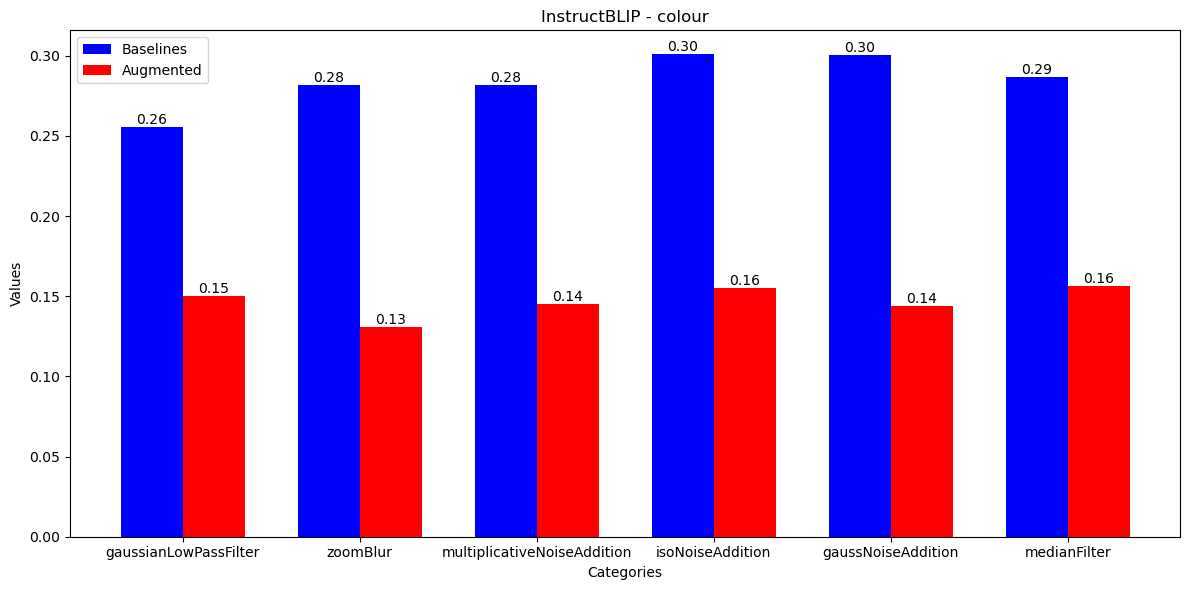

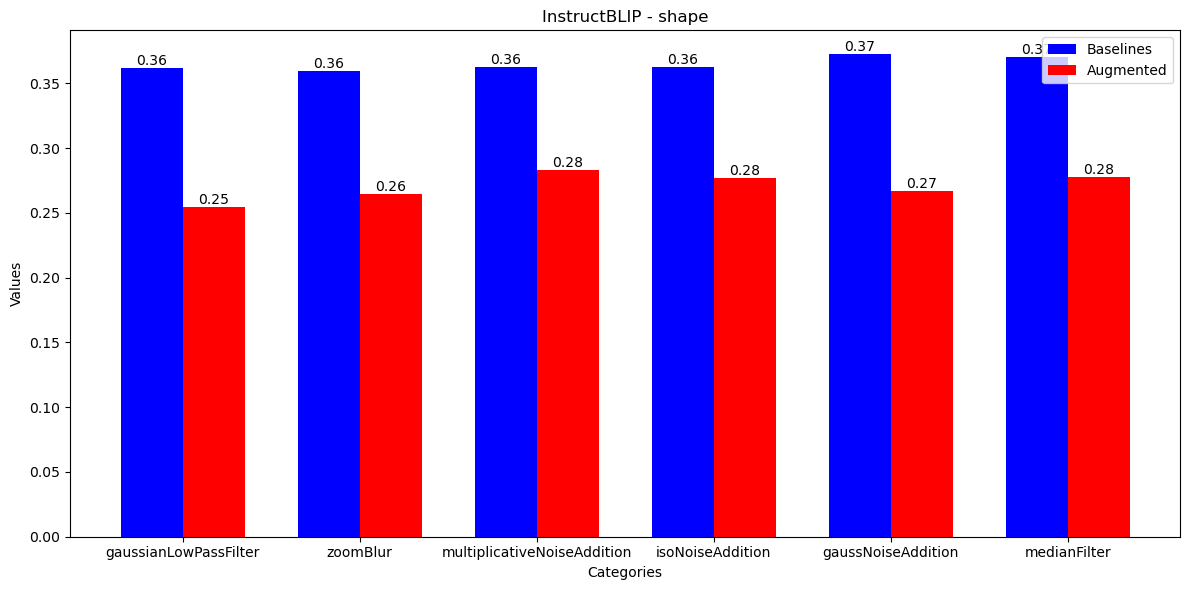

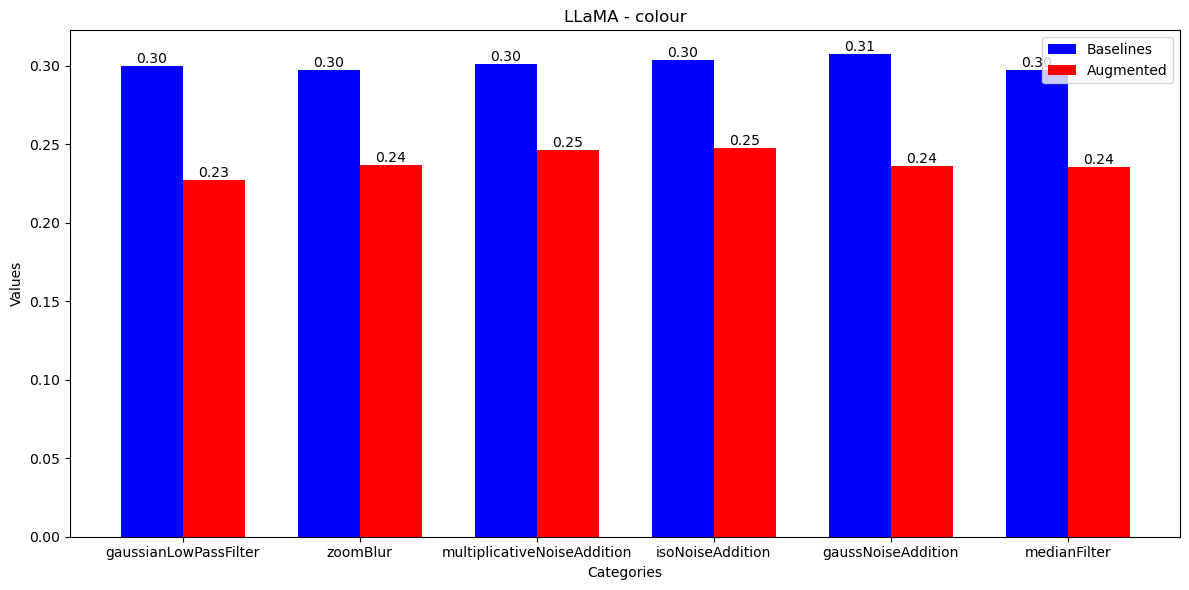

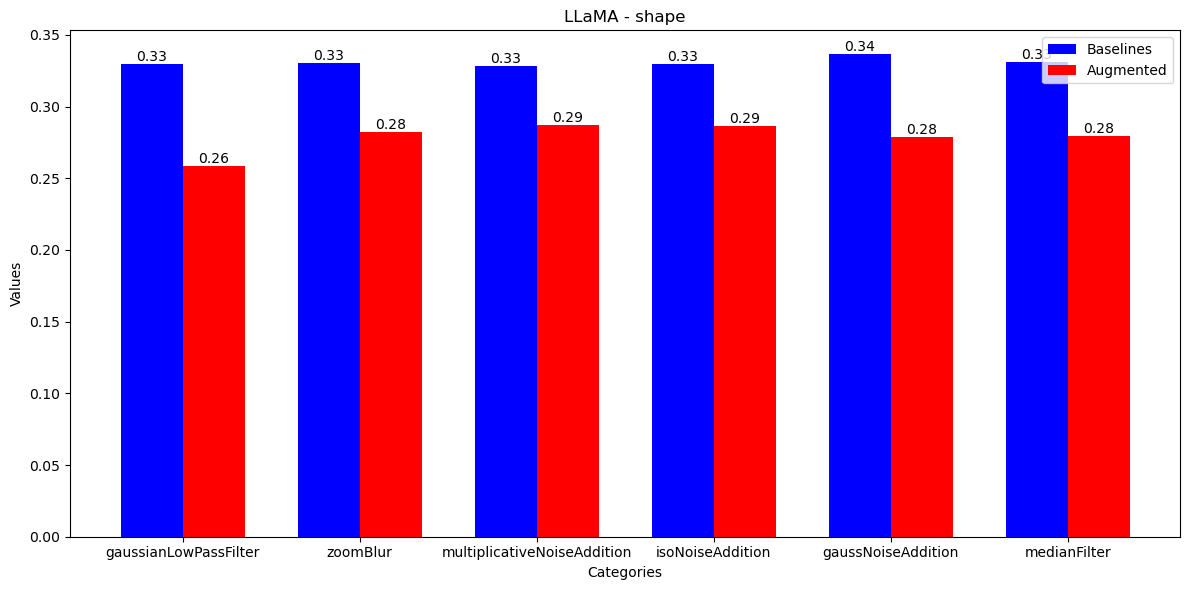

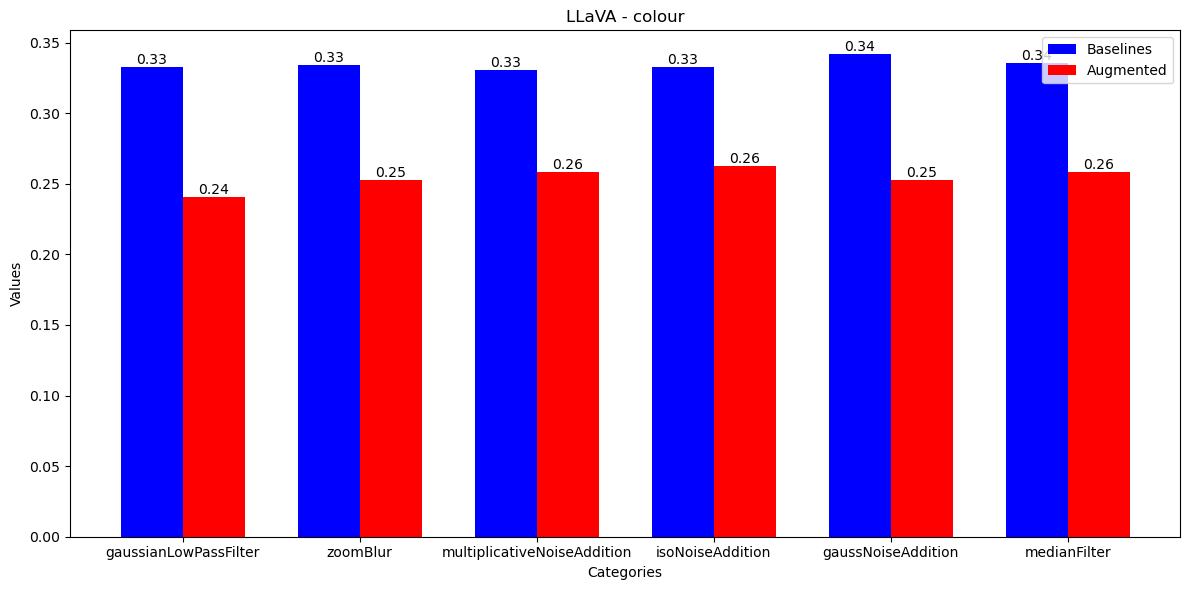

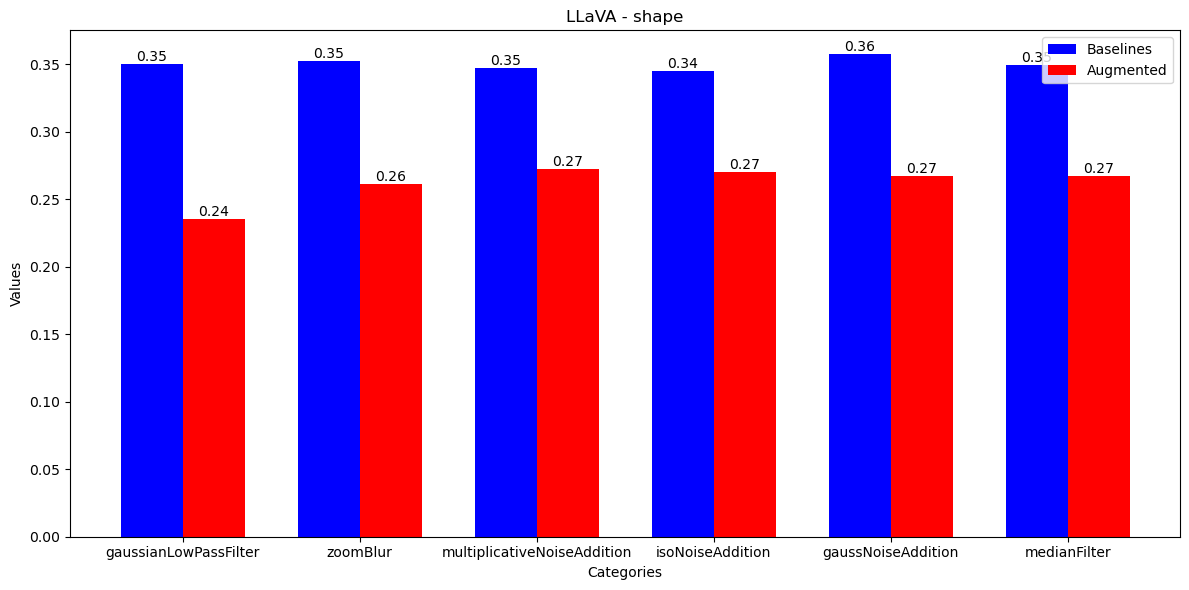

In [7]:
MLLMs = ['InstructBLIP', 'LLaMA', 'LLaVA']

properties = ['colour', 'shape']
for model in MLLMs:
    for prop in properties:
        file = open(f'/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/Image_Augmentation/Zephyr_Analysis/{model}/{prop}_augmentation_wise_compiled_results.json')
        
        objects = json.load(file)
        
        categories = [key.split('(')[0] for key in objects[0].keys()]
        array1 = [objects[0][key]['accuracy'] for key in objects[0]]
        array2 = [objects[1][key]['accuracy'] for key in objects[1]]
        
        bar_width = 0.35
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        bar1 = ax.bar(np.arange(len(categories)) - bar_width / 2, array1, width=bar_width, color='blue', label='Baselines')
        bar2 = ax.bar(np.arange(len(categories)) + bar_width / 2, array2, width=bar_width, color='red', label='Augmented')
        
        plt.title(f"{model} - {prop}")
        ax.set_xlabel('Categories')
        ax.set_ylabel('Values')
        ax.set_xticks(np.arange(len(categories)))
        ax.set_xticklabels(categories)  # Rotate x-axis labels
        
        for i, value in enumerate(array1):
            ax.text(i - bar_width / 2, value, f'{value:.2f}', ha='center', va='bottom')
        
        for i, value in enumerate(array2):
            ax.text(i + bar_width / 2, value, f'{value:.2f}', ha='center', va='bottom')
        
        
        ax.legend()
        
        plt.tight_layout()
        plt.savefig(f'/scratch/averma90/MLLM_Hallucinations_CLEVR/outputs/Image_Augmentation/Zephyr_Analysis/ObjectPropertyWiseResults/{model}_{prop}.png', dpi=600)
        plt.show()
